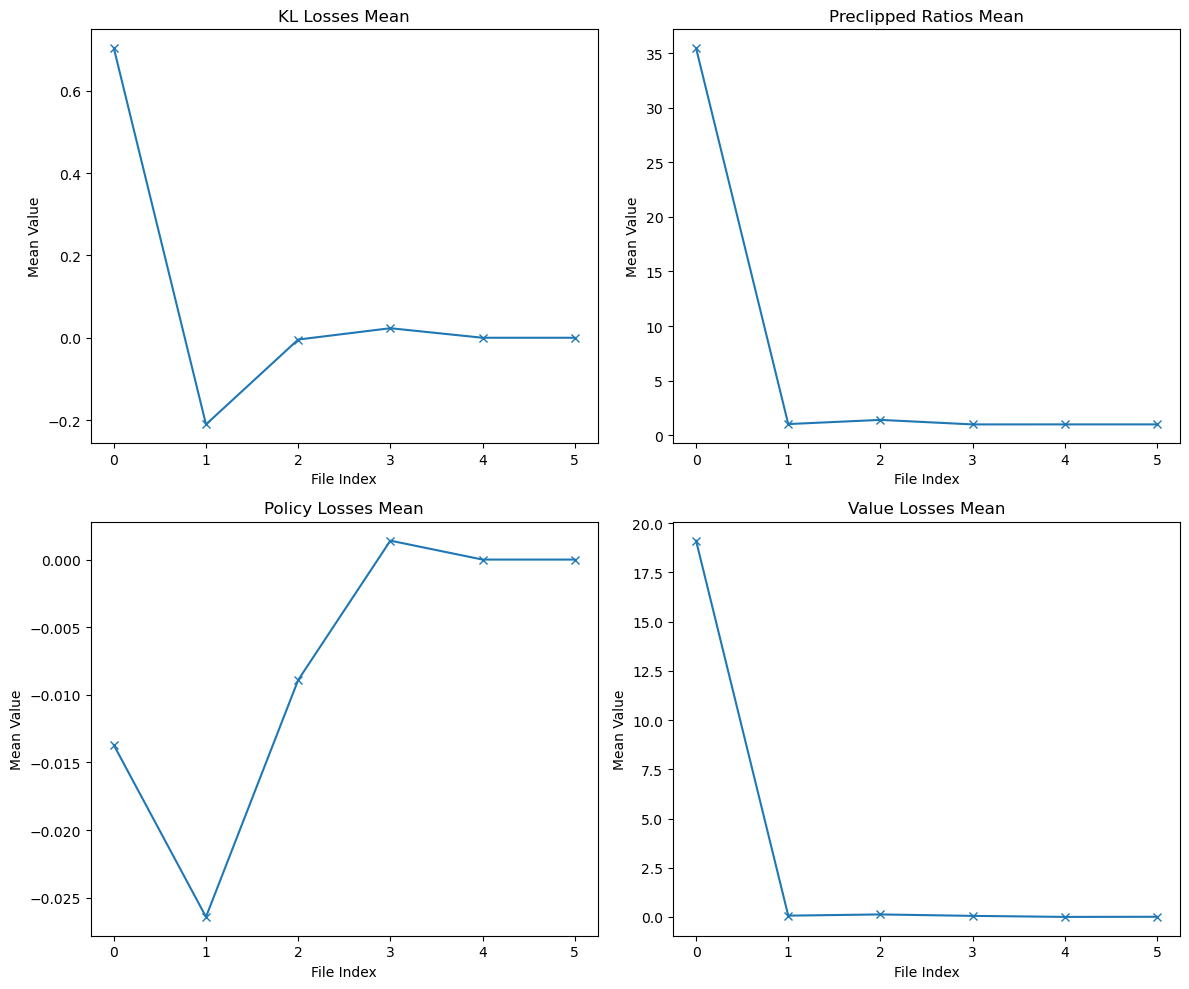

In [3]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# Folder containing the JSON files
folder_relative_path = r"..\logs"

# Initialize lists to store means for each key
kl_losses_mean = []
preclipped_ratios_mean = []
policy_losses_mean = []
value_losses_mean = []

# Get all JSON files in the folder
json_files = [f for f in os.listdir(folder_relative_path) if f.endswith('.json')]

# Loop through each JSON file
for json_file in json_files:
    json_file_path = os.path.join(folder_relative_path, json_file)
    
    # Open and load the JSON data
    with open(json_file_path, "r") as f:
        data = json.load(f)
        
    # Calculate the mean for each key and append to respective lists
    kl_losses_mean.append(np.mean(data["kl_losses"]))
    preclipped_ratios_mean.append(np.mean(data["preclipped_ratios"]))
    policy_losses_mean.append(np.mean(data["policy_losses"]))
    value_losses_mean.append(np.mean(data["value_losses"]))

# Create subplots to plot each metric in a separate graph
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each set of means in a separate subplot
axes[0, 0].plot(range(len(json_files)), kl_losses_mean, label='KL Losses Mean', marker='x')
axes[0, 0].set_title('KL Losses Mean')
axes[0, 0].set_xlabel('File Index')
axes[0, 0].set_ylabel('Mean Value')

axes[0, 1].plot(range(len(json_files)), preclipped_ratios_mean, label='Preclipped Ratios Mean', marker='x')
axes[0, 1].set_title('Preclipped Ratios Mean')
axes[0, 1].set_xlabel('File Index')
axes[0, 1].set_ylabel('Mean Value')

axes[1, 0].plot(range(len(json_files)), policy_losses_mean, label='Policy Losses Mean', marker='x')
axes[1, 0].set_title('Policy Losses Mean')
axes[1, 0].set_xlabel('File Index')
axes[1, 0].set_ylabel('Mean Value')

axes[1, 1].plot(range(len(json_files)), value_losses_mean, label='Value Losses Mean', marker='x')
axes[1, 1].set_title('Value Losses Mean')
axes[1, 1].set_xlabel('File Index')
axes[1, 1].set_ylabel('Mean Value')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


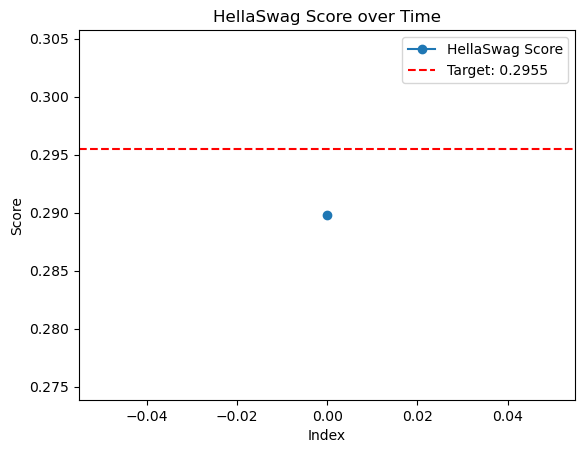

In [2]:
# hellaswag score
import matplotlib.pyplot as plt
import re  

with open(r"..\logs\hellaswag", "r") as f:
    output = [line.strip() for line in f.readlines()]

# Data extraction using regular expressions
x_values = []
y_values = []

for line in output:  # Now we iterate through the *list* of lines
    match = re.match(r'(\d+)\s+\w+\s+([\d.]+)', line)
    if match:
        x_values.append(int(match.group(1)))  # Index (convert to integer)
        y_values.append(float(match.group(2)))  # Score (convert to float)

plt.plot(x_values, y_values, marker='o', linestyle='-', label='HellaSwag Score') 

target_value = 0.2955  
plt.axhline(y=target_value, color='r', linestyle='--', label=f'Target: {target_value}')

# Customize the plot
plt.xlabel('Index')
plt.ylabel('Score')
plt.title('HellaSwag Score over Time')
plt.grid(False)  
plt.legend()   

# Show the plot
plt.show()